# Training Model - Random Over Sampling

# Import Library

In [1]:
#import all realated libraries
#import libraries for data analysis
import numpy as np
import pandas as pd

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt

# import pickle and json file for columns and model file
import pickle
import json
import joblib

# import warnings for ignore the warnings
import warnings 
warnings.filterwarnings("ignore")

# library for model selection and models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.linear_model import RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
import xgboost as xgb
import lightgbm as lgb
from lightgbm import LGBMClassifier

# evaluation metrics for classification model
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score, roc_auc_score

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from scikeras.wrappers import KerasClassifier
from tensorflow import keras
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier

## Read Data

In [2]:
#Read data X_train dan y_ros hasil dari data preparation
X_ros_clean = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/X_ros_clean.pkl") 
y_ros = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/y_ros.pkl")

#Read data X_valid dan y_valid hasil dari data preparation
X_valid_clean = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/X_valid_clean.pkl")
y_valid = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/y_valid.pkl")

#Read data X_test dan y_test hasil dari data preparation
X_test_clean = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/X_test_clean.pkl")
y_test = joblib.load("C:/Users/HALAL/Final Project ML Process/dataset/3 - final/2 - Scaling Data - Standart Scaler/y_test.pkl")

## Baseline Model

In [3]:
y_ros.value_counts(normalize = True)
# baseline akurasi = 80%
# Before Smote Sampling

0    0.5
1    0.5
Name: Exited, dtype: float64

In [4]:
y_baseline_predict = y_ros.mean()
y_baseline_predict

0.5

## Logistic Regression

In [5]:
# Build Logistic Regression
logreg_awal = LogisticRegression(random_state = 123)

In [6]:
# fit Logistic Regression
logreg_awal.fit(X_ros_clean, y_ros)

LogisticRegression(random_state=123)

In [7]:
# Melihat Score dari model logreg
logreg_awal.score(X_ros_clean, y_ros)

0.7054597701149425

In [8]:
#Prediksi Logreg
logreg_pred = logreg_awal.predict(X_test_clean)

In [9]:
#Melihat Classification report
print(classification_report(y_test, logreg_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1424
           1       0.37      0.78      0.51       376

    accuracy                           0.68      1800
   macro avg       0.65      0.72      0.63      1800
weighted avg       0.81      0.68      0.71      1800



In [10]:
#Melihat score data train, validation dan test
print("Train_Score = ", logreg_awal.score(X_ros_clean, y_ros), 
      "Valid_Score = ",logreg_awal.score(X_valid_clean, y_valid),
      "Test_Score = ", logreg_awal.score(X_test_clean, y_test))

Train_Score =  0.7054597701149425 Valid_Score =  0.665 Test_Score =  0.6788888888888889


## Tuning Parameter Logistic Regression

In [11]:
# Membentuk parameter untuk eksperimentasi
lr_param_grid = {
    'C' : [0.01, 0.05, 0.1, 0.5, 1, 5],
    'solver' : ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'penalty' : ['l1', 'l2', 'elasticnet','none']
}

In [12]:
# Cross Validation menggunakan GridsearchCV
lr_grid = GridSearchCV(LogisticRegression(random_state = 123), lr_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [13]:
#Fitting Model lr grid
lr_grid.fit(X_ros_clean, y_ros)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.691 total time=   0.1s
[CV 2/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.713 total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.716 total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.684 total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=liblinear;, score=0.711 total time=   0.0s
[CV 1/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.01, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.01, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C=0.01, penalty=l1,

[CV 5/5] END .C=0.01, penalty=none, solver=saga;, score=0.707 total time=   0.0s
[CV 1/5] END C=0.05, penalty=l1, solver=liblinear;, score=0.696 total time=   0.0s
[CV 2/5] END C=0.05, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 3/5] END C=0.05, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 4/5] END C=0.05, penalty=l1, solver=liblinear;, score=0.683 total time=   0.0s
[CV 5/5] END C=0.05, penalty=l1, solver=liblinear;, score=0.710 total time=   0.0s
[CV 1/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END C=0.05, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END ....C=0.05, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END ....C

[CV 5/5] END .C=0.05, penalty=none, solver=saga;, score=0.707 total time=   0.1s
[CV 1/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.693 total time=   0.0s
[CV 2/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 3/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.718 total time=   0.0s
[CV 4/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.680 total time=   0.1s
[CV 5/5] END C=0.1, penalty=l1, solver=liblinear;, score=0.710 total time=   0.1s
[CV 1/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=0.1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.1

[CV 1/5] END C=0.5, penalty=l1, solver=liblinear;, score=0.693 total time=   0.1s
[CV 2/5] END C=0.5, penalty=l1, solver=liblinear;, score=0.712 total time=   0.1s
[CV 3/5] END C=0.5, penalty=l1, solver=liblinear;, score=0.716 total time=   0.1s
[CV 4/5] END C=0.5, penalty=l1, solver=liblinear;, score=0.678 total time=   0.1s
[CV 5/5] END C=0.5, penalty=l1, solver=liblinear;, score=0.708 total time=   0.1s
[CV 1/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END .C=0.5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .....C=0.5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .....C=0.5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .....C=0.5

[CV 1/5] END .C=1, penalty=l1, solver=liblinear;, score=0.693 total time=   0.2s
[CV 2/5] END .C=1, penalty=l1, solver=liblinear;, score=0.712 total time=   0.2s
[CV 3/5] END .C=1, penalty=l1, solver=liblinear;, score=0.716 total time=   0.3s
[CV 4/5] END .C=1, penalty=l1, solver=liblinear;, score=0.678 total time=   0.7s
[CV 5/5] END .C=1, penalty=l1, solver=liblinear;, score=0.707 total time=   0.2s
[CV 1/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ...C=1, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......C=1, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .......C=1, pen

[CV 2/5] END .C=5, penalty=l1, solver=liblinear;, score=0.712 total time=   0.9s
[CV 3/5] END .C=5, penalty=l1, solver=liblinear;, score=0.717 total time=   1.5s
[CV 4/5] END .C=5, penalty=l1, solver=liblinear;, score=0.678 total time=   1.2s
[CV 5/5] END .C=5, penalty=l1, solver=liblinear;, score=0.707 total time=   0.8s
[CV 1/5] END ...C=5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 2/5] END ...C=5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 3/5] END ...C=5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 4/5] END ...C=5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 5/5] END ...C=5, penalty=l1, solver=newton-cg;, score=nan total time=   0.0s
[CV 1/5] END .......C=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 2/5] END .......C=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 3/5] END .......C=5, penalty=l1, solver=lbfgs;, score=nan total time=   0.0s
[CV 4/5] END .......C=5, pen

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=123),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 5],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=3)

In [14]:
#Melihat parameter terbaik untuk model
print(lr_grid.best_params_)

{'C': 0.01, 'penalty': 'l2', 'solver': 'newton-cg'}


In [15]:
#Input parameter terbaik hasil GridsearchCV
lr_grid_cv  = LogisticRegression(C = lr_grid.best_params_["C"],
                                 penalty = lr_grid.best_params_["penalty"],
                                 solver = lr_grid.best_params_["solver"])

#Kembali fitting model
lr_grid_cv.fit(X_ros_clean, y_ros)

LogisticRegression(C=0.01, solver='newton-cg')

In [16]:
print(f"Training Data Score: {lr_grid_cv.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {lr_grid_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {lr_grid_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.7066271551724138
Validating Data Score: 0.6641666666666667
Testing Data Score: 0.6816666666666666


In [17]:
#Prediksi dengan menggunakan data test
logregtun_pred = lr_grid_cv.predict(X_test_clean)

In [18]:
#Melihat Classification report
print(classification_report(y_test, logregtun_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.65      0.76      1424
           1       0.38      0.79      0.51       376

    accuracy                           0.68      1800
   macro avg       0.65      0.72      0.64      1800
weighted avg       0.81      0.68      0.71      1800



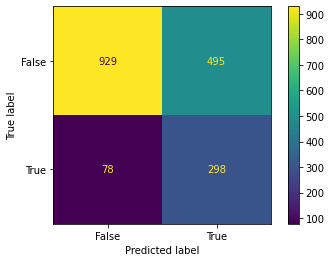

In [19]:
ConfusionMatrixDisplay.from_predictions(y_test, logregtun_pred, display_labels = [False, True])
plt.show()

## Support Vector Classifier

In [20]:
svc_ori = SVC(random_state = 123)

In [21]:
# fit Support Vector Classifier
svc_ori.fit(X_ros_clean, y_ros)

SVC(random_state=123)

In [22]:
#Cek Score model SVC
svc_ori.score(X_ros_clean, y_ros)

0.8127693965517241

In [23]:
svc_predict = svc_ori.predict(X_test_clean)

In [24]:
print(classification_report(y_test, svc_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1424
           1       0.49      0.80      0.61       376

    accuracy                           0.78      1800
   macro avg       0.71      0.79      0.73      1800
weighted avg       0.84      0.78      0.80      1800



In [25]:
print(f"Training Data Score: {svc_ori.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {svc_ori.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {svc_ori.score(X_test_clean, y_test)}")

Training Data Score: 0.8127693965517241
Validating Data Score: 0.7641666666666667
Testing Data Score: 0.7827777777777778


## Tuning Parameter SVC

In [26]:
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
param_grid = {'kernel' : ['linear', 'rbf', 'poly', 'sigmoid'],
              'C': [0.0005,0.001, 0.01, 0.1, 0.5],
              'gamma': ['scale', 'auto']
             }

In [27]:
#Membentuk parameter untuk eksperimentasi
svc_grid = GridSearchCV(SVC(random_state = 123), 
                        param_grid, 
                        verbose=3, 
                        cv= 5, 
                        n_jobs=4, 
                        scoring='accuracy')

In [28]:
#Melakukan fitting model gridsearchcv
svc_grid.fit(X_ros_clean, y_ros)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=5, estimator=SVC(random_state=123), n_jobs=4,
             param_grid={'C': [0.0005, 0.001, 0.01, 0.1, 0.5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']},
             scoring='accuracy', verbose=3)

In [29]:
#Melihat parameter terbaik
svc_grid.best_params_

{'C': 0.5, 'gamma': 'scale', 'kernel': 'rbf'}

In [30]:
#Melakukan input parameter terbaik hasil gridsearch
svc_grid_cv  = SVC(kernel = svc_grid.best_params_["kernel"],
                   gamma = svc_grid.best_params_["gamma"],
                   C = svc_grid.best_params_["C"]
                  )

In [31]:
svc_grid_cv.fit(X_ros_clean, y_ros)

SVC(C=0.5)

In [32]:
print(f"Training Data Score: {svc_grid_cv.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {svc_grid_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {svc_grid_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.8000179597701149
Validating Data Score: 0.76
Testing Data Score: 0.7811111111111111


In [33]:
svc_pred_cv = svc_grid_cv.predict(X_test_clean)

In [34]:
print(classification_report(y_test, svc_pred_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1424
           1       0.49      0.80      0.60       376

    accuracy                           0.78      1800
   macro avg       0.71      0.79      0.73      1800
weighted avg       0.84      0.78      0.80      1800



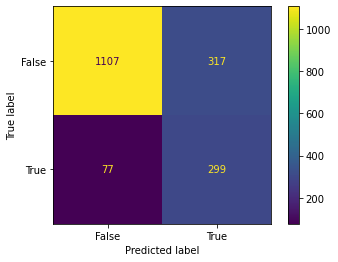

In [35]:
ConfusionMatrixDisplay.from_predictions(y_test, svc_pred_cv, display_labels = [False, True])
plt.show()

## Decisiontree

In [36]:
# Model Decision Tree
decTree = DecisionTreeClassifier(random_state = 123)

In [37]:
# Fitting model
decTree.fit(X_ros_clean, y_ros)

DecisionTreeClassifier(random_state=123)

In [38]:
# Model score
decTree.score(X_ros_clean, y_ros)

1.0

In [39]:
#Prediksi data menggunakan data test
dectree_predict = decTree.predict(X_test_clean)

In [40]:
#Melihat Classification report
print(classification_report(y_test, dectree_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      1424
           1       0.52      0.56      0.54       376

    accuracy                           0.80      1800
   macro avg       0.70      0.71      0.70      1800
weighted avg       0.81      0.80      0.80      1800



In [41]:
#Melihat score prediksi dari data train, valid dan test
print(f"Training Data Score: {decTree.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {decTree.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {decTree.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.7875
Testing Data Score: 0.7994444444444444


## Tuning Parameter Decisiontree

In [42]:
# Buat parameter untuk eksperimen
decTree_param = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                "criterion": ["gini", "entropy", "log_loss"],
                 'min_samples_split': [2, 5, 10],
                 'min_samples_leaf': [1, 2, 4],}

In [43]:
# Buat plan eksperimentasi
random_decTree = GridSearchCV(estimator = DecisionTreeClassifier(random_state=123),
                              param_grid = decTree_param,
                              cv = 5,
                              scoring = "accuracy") 

In [44]:
# Lakukan fitting eksperimentasi
random_decTree.fit(X_ros_clean, y_ros)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy')

In [45]:
random_decTree.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [46]:
# Buat model
best_decTree = DecisionTreeClassifier(max_depth = random_decTree.best_params_["max_depth"],
                                      criterion = random_decTree.best_params_["criterion"],
                                      min_samples_leaf = random_decTree.best_params_["min_samples_leaf"],
                                      min_samples_split = random_decTree.best_params_["min_samples_split"],
                                      random_state = 123)

In [47]:
# Fit model
best_decTree.fit(X_ros_clean, y_ros)

DecisionTreeClassifier(max_depth=12, random_state=123)

In [48]:
# Cek Train data
best_decTree.score(X_ros_clean, y_ros)

0.914691091954023

In [49]:
y_predict_dectree = best_decTree.predict(X_test_clean)

In [50]:
print(classification_report(y_test, y_predict_dectree))

              precision    recall  f1-score   support

           0       0.91      0.83      0.87      1424
           1       0.51      0.68      0.58       376

    accuracy                           0.80      1800
   macro avg       0.71      0.75      0.72      1800
weighted avg       0.82      0.80      0.81      1800



In [51]:
print(f"Training Data Score: {best_decTree.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {best_decTree.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {best_decTree.score(X_test_clean, y_test)}")

Training Data Score: 0.914691091954023
Validating Data Score: 0.7675
Testing Data Score: 0.7961111111111111


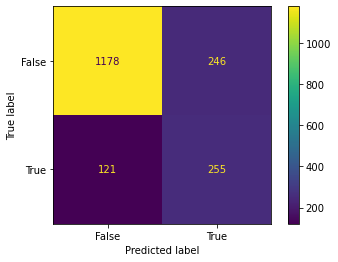

In [52]:
ConfusionMatrixDisplay.from_predictions(y_test, y_predict_dectree, display_labels = [False, True])
plt.show()

## Randomforest Classifier

In [53]:
# Build random forest
random_forest = RandomForestClassifier(n_estimators = 100, 
                                       criterion = "gini",
                                       max_features = "sqrt",
                                       max_depth=6, 
                                       min_samples_leaf=8,
                                       random_state = 123)

In [54]:
random_forest.fit(X_ros_clean, y_ros)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=8,
                       random_state=123)

In [55]:
random_forest.fit(X_ros_clean, y_ros)

RandomForestClassifier(max_depth=6, max_features='sqrt', min_samples_leaf=8,
                       random_state=123)

In [56]:
# Model score
random_forest.score(X_ros_clean, y_ros)

0.7974137931034483

In [57]:
y_pred_rf = random_forest.predict(X_test_clean)

In [58]:
print(classification_report(y_test, y_pred_rf, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1424
           1       0.48      0.79      0.60       376

    accuracy                           0.78      1800
   macro avg       0.71      0.78      0.72      1800
weighted avg       0.84      0.78      0.80      1800



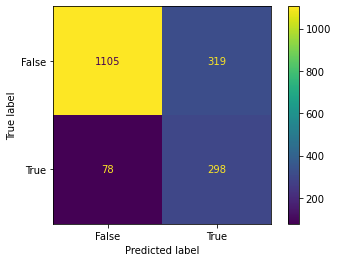

In [59]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels = [False, True])
plt.show()

## Tuning Parameter Randomforest

In [60]:
# Buat parameter untuk eksperimen
random_param = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                'n_estimators': [50, 100, 200],
                'min_samples_leaf': [1, 2, 4],
                'min_samples_split': [2, 5, 10],
                "criterion": ["gini", "entropy"]
                }

In [61]:
# Buat plan eksperimentasi
random_forestcls = GridSearchCV(estimator = RandomForestClassifier(random_state=123),
                                param_grid = random_param,
                                cv = 5,
                                scoring = "accuracy") 

In [62]:
# Lakukan fitting eksperimentasi
random_forestcls.fit(X_ros_clean, y_ros)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=123),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [63]:
random_forestcls.best_params_

{'criterion': 'gini',
 'max_depth': 12,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [64]:
# Buat model
random_forestcls_cv = RandomForestClassifier(max_depth = random_forestcls.best_params_["max_depth"],
                                             criterion = random_forestcls.best_params_["criterion"],
                                             n_estimators = random_forestcls.best_params_["n_estimators"],
                                             min_samples_leaf = random_forestcls.best_params_["min_samples_leaf"],
                                             min_samples_split = random_forestcls.best_params_["min_samples_split"],
                                             random_state = 123)

In [65]:
# Fit model
random_forestcls_cv.fit(X_ros_clean, y_ros)

RandomForestClassifier(max_depth=12, n_estimators=200, random_state=123)

In [66]:
predict_randomcls_cv = random_forestcls_cv.predict(X_test_clean)

In [67]:
print(classification_report(y_test, predict_randomcls_cv))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1424
           1       0.59      0.69      0.64       376

    accuracy                           0.83      1800
   macro avg       0.75      0.78      0.76      1800
weighted avg       0.85      0.83      0.84      1800



In [68]:
print(f"Training Data Score: {random_forestcls_cv.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {random_forestcls_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {random_forestcls_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.9683010057471264
Validating Data Score: 0.8341666666666666
Testing Data Score: 0.8338888888888889


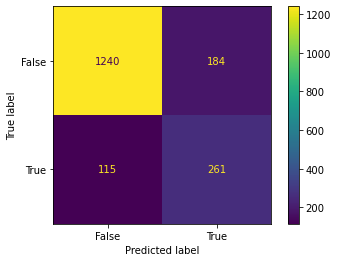

In [69]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_randomcls_cv, display_labels = [False, True])
plt.show()

## Ridge Classifier

In [70]:
ridge = RidgeClassifier(random_state = 123) #create a ridge classifier object

In [71]:
ridge.fit(X_ros_clean, y_ros) #train the model

RidgeClassifier(random_state=123)

In [72]:
ridge.score(X_ros_clean, y_ros)

0.703753591954023

In [73]:
pred_ridge = ridge.predict(X_test_clean)

In [74]:
print(classification_report(y_test, pred_ridge, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1424
           1       0.37      0.78      0.50       376

    accuracy                           0.68      1800
   macro avg       0.65      0.72      0.64      1800
weighted avg       0.80      0.68      0.71      1800



In [75]:
print(f"Training Data Score: {ridge.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {ridge.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {ridge.score(X_test_clean, y_test)}")

Training Data Score: 0.703753591954023
Validating Data Score: 0.6683333333333333
Testing Data Score: 0.6816666666666666


## Tuning Parameter Ridge Classifier

In [76]:
clf_ridge = RidgeClassifier(random_state = 123)

alpha = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

# define grid search
grid = dict(alpha=alpha)

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

ridge_cv = GridSearchCV(estimator=clf_ridge, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)

In [77]:
ridge_cv.fit(X_ros_clean, y_ros)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=RidgeClassifier(random_state=123),
             n_jobs=-1,
             param_grid={'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9,
                                   1.0]},
             scoring='accuracy')

In [78]:
ridge_cv.best_params_

{'alpha': 0.1}

In [79]:
# Buat model
ridge_cv = RidgeClassifier(alpha = ridge_cv.best_params_["alpha"],
                           random_state = 123)

In [80]:
# Fit model
ridge_cv.fit(X_ros_clean, y_ros)

RidgeClassifier(alpha=0.1, random_state=123)

In [81]:
# Cek Test data
ridge_cv.score(X_ros_clean, y_ros)

0.703753591954023

In [82]:
predict_ridgecv = ridge_cv.predict(X_test_clean)

In [83]:
print(classification_report(y_test, predict_ridgecv))

              precision    recall  f1-score   support

           0       0.92      0.66      0.77      1424
           1       0.37      0.78      0.50       376

    accuracy                           0.68      1800
   macro avg       0.65      0.72      0.64      1800
weighted avg       0.80      0.68      0.71      1800



In [84]:
print(f"Training Data Score: {ridge_cv.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {ridge_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {ridge_cv.score(X_test_clean, y_test)}")

Training Data Score: 0.703753591954023
Validating Data Score: 0.6683333333333333
Testing Data Score: 0.6816666666666666


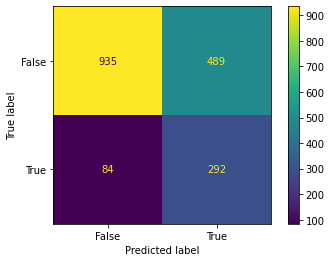

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test, predict_ridgecv, display_labels = [False, True])
plt.show()

## KNeighborsClassifier

In [86]:
# Build KNeighborsRegressor
knn_awal = KNeighborsClassifier()

In [87]:
# fit KNeighborsRegressor
knn_awal.fit(X_ros_clean, y_ros)

KNeighborsClassifier()

In [88]:
knn_awal.score(X_ros_clean, y_ros)

0.8903556034482759

In [89]:
knn_pred = knn_awal.predict(X_test_clean)

In [90]:
print(classification_report(y_test, knn_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1424
           1       0.40      0.69      0.51       376

    accuracy                           0.72      1800
   macro avg       0.65      0.71      0.65      1800
weighted avg       0.79      0.72      0.74      1800



In [91]:
print(f"Training Data Score: {knn_awal.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {knn_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {knn_awal.score(X_test_clean, y_test)}")

Training Data Score: 0.8903556034482759
Validating Data Score: 0.7166666666666667
Testing Data Score: 0.7166666666666667


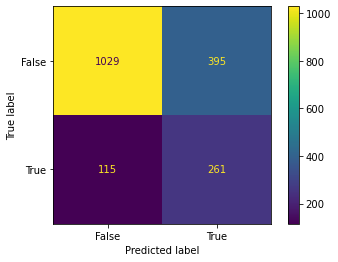

In [92]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_pred, display_labels = [False, True])
plt.show()

## Tuning Parameter KNeighborsClassifier

In [93]:
kn_param_grid = {
    'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30],
    'weights' : ['uniform', 'distance'],
    'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
}

In [94]:
knn = KNeighborsClassifier()

In [95]:
kn_grid = GridSearchCV(knn, kn_param_grid, verbose=3, cv= 5, scoring='accuracy')

In [96]:
kn_grid.fit(X_ros_clean, y_ros)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.911 total time=   0.1s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.921 total time=   0.1s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.939 total time=   0.1s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.922 total time=   0.1s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=uniform;, score=0.929 total time=   0.1s
[CV 1/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.911 total time=   0.0s
[CV 2/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.921 total time=   0.0s
[CV 3/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.939 total time=   0.0s
[CV 4/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.922 total time=   0.0s
[CV 5/5] END algorithm=auto, n_neighbors=1, weights=distance;, score=0.929 total time=   0.0s
[

[CV 3/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.884 total time=   0.2s
[CV 4/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.860 total time=   0.2s
[CV 5/5] END algorithm=auto, n_neighbors=9, weights=distance;, score=0.879 total time=   0.2s
[CV 1/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.769 total time=   0.2s
[CV 2/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.791 total time=   0.2s
[CV 3/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.801 total time=   0.2s
[CV 4/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.770 total time=   0.2s
[CV 5/5] END algorithm=auto, n_neighbors=10, weights=uniform;, score=0.788 total time=   0.2s
[CV 1/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.860 total time=   0.2s
[CV 2/5] END algorithm=auto, n_neighbors=10, weights=distance;, score=0.883 total time=   0.2s
[CV 3/5] END algorithm=auto, n_neighbors=10, weights=dista

[CV 5/5] END algorithm=auto, n_neighbors=18, weights=uniform;, score=0.777 total time=   0.3s
[CV 1/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.862 total time=   0.2s
[CV 2/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.885 total time=   0.2s
[CV 3/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.895 total time=   0.2s
[CV 4/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.867 total time=   0.2s
[CV 5/5] END algorithm=auto, n_neighbors=18, weights=distance;, score=0.881 total time=   0.2s
[CV 1/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.752 total time=   0.3s
[CV 2/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.768 total time=   0.3s
[CV 3/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.781 total time=   0.3s
[CV 4/5] END algorithm=auto, n_neighbors=19, weights=uniform;, score=0.758 total time=   0.3s
[CV 5/5] END algorithm=auto, n_neighbors=19, weights=un

[CV 2/5] END algorithm=auto, n_neighbors=27, weights=uniform;, score=0.767 total time=   0.3s
[CV 3/5] END algorithm=auto, n_neighbors=27, weights=uniform;, score=0.784 total time=   0.3s
[CV 4/5] END algorithm=auto, n_neighbors=27, weights=uniform;, score=0.753 total time=   0.3s
[CV 5/5] END algorithm=auto, n_neighbors=27, weights=uniform;, score=0.773 total time=   0.3s
[CV 1/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.862 total time=   0.3s
[CV 2/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.886 total time=   0.3s
[CV 3/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.896 total time=   0.3s
[CV 4/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.870 total time=   0.3s
[CV 5/5] END algorithm=auto, n_neighbors=27, weights=distance;, score=0.881 total time=   0.3s
[CV 1/5] END algorithm=auto, n_neighbors=28, weights=uniform;, score=0.752 total time=   0.3s
[CV 2/5] END algorithm=auto, n_neighbors=28, weights=un

[CV 2/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.864 total time=   0.3s
[CV 3/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.883 total time=   0.3s
[CV 4/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.865 total time=   0.3s
[CV 5/5] END algorithm=ball_tree, n_neighbors=5, weights=distance;, score=0.864 total time=   0.3s
[CV 1/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.774 total time=   0.4s
[CV 2/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.800 total time=   0.4s
[CV 3/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.806 total time=   0.4s
[CV 4/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.800 total time=   0.4s
[CV 5/5] END algorithm=ball_tree, n_neighbors=6, weights=uniform;, score=0.789 total time=   0.4s
[CV 1/5] END algorithm=ball_tree, n_neighbors=6, weights=distance;, score=0.866 total time=   0.3s
[CV 2/5] END al

[CV 5/5] END algorithm=ball_tree, n_neighbors=13, weights=distance;, score=0.876 total time=   0.4s
[CV 1/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.757 total time=   0.4s
[CV 2/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.771 total time=   0.4s
[CV 3/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.788 total time=   0.4s
[CV 4/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.759 total time=   0.4s
[CV 5/5] END algorithm=ball_tree, n_neighbors=14, weights=uniform;, score=0.779 total time=   0.4s
[CV 1/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.870 total time=   0.3s
[CV 2/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.881 total time=   0.4s
[CV 3/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.891 total time=   0.3s
[CV 4/5] END algorithm=ball_tree, n_neighbors=14, weights=distance;, score=0.866 total time=   0.4s
[CV 5

[CV 3/5] END algorithm=ball_tree, n_neighbors=22, weights=uniform;, score=0.781 total time=   0.4s
[CV 4/5] END algorithm=ball_tree, n_neighbors=22, weights=uniform;, score=0.754 total time=   0.4s
[CV 5/5] END algorithm=ball_tree, n_neighbors=22, weights=uniform;, score=0.773 total time=   0.4s
[CV 1/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.865 total time=   0.4s
[CV 2/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.885 total time=   0.4s
[CV 3/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.890 total time=   0.4s
[CV 4/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.866 total time=   0.4s
[CV 5/5] END algorithm=ball_tree, n_neighbors=22, weights=distance;, score=0.878 total time=   0.4s
[CV 1/5] END algorithm=ball_tree, n_neighbors=23, weights=uniform;, score=0.747 total time=   0.4s
[CV 2/5] END algorithm=ball_tree, n_neighbors=23, weights=uniform;, score=0.765 total time=   0.4s
[CV 3

[CV 1/5] END algorithm=ball_tree, n_neighbors=30, weights=distance;, score=0.867 total time=   0.4s
[CV 2/5] END algorithm=ball_tree, n_neighbors=30, weights=distance;, score=0.888 total time=   0.4s
[CV 3/5] END algorithm=ball_tree, n_neighbors=30, weights=distance;, score=0.896 total time=   0.4s
[CV 4/5] END algorithm=ball_tree, n_neighbors=30, weights=distance;, score=0.870 total time=   0.4s
[CV 5/5] END algorithm=ball_tree, n_neighbors=30, weights=distance;, score=0.881 total time=   0.4s
[CV 1/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.911 total time=   0.1s
[CV 2/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.921 total time=   0.1s
[CV 3/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.939 total time=   0.1s
[CV 4/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.922 total time=   0.1s
[CV 5/5] END algorithm=kd_tree, n_neighbors=1, weights=uniform;, score=0.929 total time=   0.1s
[CV 1/5] END algorit

[CV 1/5] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, score=0.769 total time=   0.2s
[CV 2/5] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, score=0.784 total time=   0.2s
[CV 3/5] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, score=0.803 total time=   0.2s
[CV 4/5] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, score=0.771 total time=   0.2s
[CV 5/5] END algorithm=kd_tree, n_neighbors=9, weights=uniform;, score=0.799 total time=   0.2s
[CV 1/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.858 total time=   0.2s
[CV 2/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.874 total time=   0.2s
[CV 3/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.884 total time=   0.2s
[CV 4/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.860 total time=   0.2s
[CV 5/5] END algorithm=kd_tree, n_neighbors=9, weights=distance;, score=0.879 total time=   0.2s
[CV 1/5] END algorithm=kd_tree, n_n

[CV 1/5] END algorithm=kd_tree, n_neighbors=17, weights=distance;, score=0.863 total time=   0.2s
[CV 2/5] END algorithm=kd_tree, n_neighbors=17, weights=distance;, score=0.883 total time=   0.2s
[CV 3/5] END algorithm=kd_tree, n_neighbors=17, weights=distance;, score=0.896 total time=   0.2s
[CV 4/5] END algorithm=kd_tree, n_neighbors=17, weights=distance;, score=0.864 total time=   0.2s
[CV 5/5] END algorithm=kd_tree, n_neighbors=17, weights=distance;, score=0.881 total time=   0.2s
[CV 1/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.754 total time=   0.3s
[CV 2/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.766 total time=   0.3s
[CV 3/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.781 total time=   0.3s
[CV 4/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.750 total time=   0.3s
[CV 5/5] END algorithm=kd_tree, n_neighbors=18, weights=uniform;, score=0.777 total time=   0.3s
[CV 1/5] END algorithm=kd

[CV 1/5] END algorithm=kd_tree, n_neighbors=26, weights=uniform;, score=0.746 total time=   0.3s
[CV 2/5] END algorithm=kd_tree, n_neighbors=26, weights=uniform;, score=0.767 total time=   0.3s
[CV 3/5] END algorithm=kd_tree, n_neighbors=26, weights=uniform;, score=0.784 total time=   0.3s
[CV 4/5] END algorithm=kd_tree, n_neighbors=26, weights=uniform;, score=0.754 total time=   0.3s
[CV 5/5] END algorithm=kd_tree, n_neighbors=26, weights=uniform;, score=0.772 total time=   0.4s
[CV 1/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.859 total time=   0.3s
[CV 2/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.884 total time=   0.3s
[CV 3/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.894 total time=   0.3s
[CV 4/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.869 total time=   0.3s
[CV 5/5] END algorithm=kd_tree, n_neighbors=26, weights=distance;, score=0.881 total time=   0.3s
[CV 1/5] END algorithm=kd

[CV 2/5] END algorithm=brute, n_neighbors=4, weights=distance;, score=0.891 total time=   0.5s
[CV 3/5] END algorithm=brute, n_neighbors=4, weights=distance;, score=0.902 total time=   0.5s
[CV 4/5] END algorithm=brute, n_neighbors=4, weights=distance;, score=0.883 total time=   0.5s
[CV 5/5] END algorithm=brute, n_neighbors=4, weights=distance;, score=0.882 total time=   0.4s
[CV 1/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.790 total time=   0.5s
[CV 2/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.802 total time=   0.5s
[CV 3/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.827 total time=   0.5s
[CV 4/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.812 total time=   0.5s
[CV 5/5] END algorithm=brute, n_neighbors=5, weights=uniform;, score=0.806 total time=   0.5s
[CV 1/5] END algorithm=brute, n_neighbors=5, weights=distance;, score=0.860 total time=   0.4s
[CV 2/5] END algorithm=brute, n_neighbors=5, weights=di

[CV 4/5] END algorithm=brute, n_neighbors=13, weights=uniform;, score=0.763 total time=   0.5s
[CV 5/5] END algorithm=brute, n_neighbors=13, weights=uniform;, score=0.792 total time=   0.5s
[CV 1/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.867 total time=   0.4s
[CV 2/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.877 total time=   0.5s
[CV 3/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.889 total time=   0.4s
[CV 4/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.866 total time=   0.5s
[CV 5/5] END algorithm=brute, n_neighbors=13, weights=distance;, score=0.876 total time=   0.4s
[CV 1/5] END algorithm=brute, n_neighbors=14, weights=uniform;, score=0.757 total time=   0.5s
[CV 2/5] END algorithm=brute, n_neighbors=14, weights=uniform;, score=0.771 total time=   0.5s
[CV 3/5] END algorithm=brute, n_neighbors=14, weights=uniform;, score=0.788 total time=   0.5s
[CV 4/5] END algorithm=brute, n_neighbors=14,

[CV 5/5] END algorithm=brute, n_neighbors=21, weights=distance;, score=0.878 total time=   0.5s
[CV 1/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.748 total time=   0.5s
[CV 2/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.766 total time=   0.7s
[CV 3/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.781 total time=   0.5s
[CV 4/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.754 total time=   0.5s
[CV 5/5] END algorithm=brute, n_neighbors=22, weights=uniform;, score=0.773 total time=   0.5s
[CV 1/5] END algorithm=brute, n_neighbors=22, weights=distance;, score=0.865 total time=   0.4s
[CV 2/5] END algorithm=brute, n_neighbors=22, weights=distance;, score=0.885 total time=   0.5s
[CV 3/5] END algorithm=brute, n_neighbors=22, weights=distance;, score=0.890 total time=   0.4s
[CV 4/5] END algorithm=brute, n_neighbors=22, weights=distance;, score=0.866 total time=   0.4s
[CV 5/5] END algorithm=brute, n_neighbors=22,

[CV 1/5] END algorithm=brute, n_neighbors=30, weights=distance;, score=0.867 total time=   0.4s
[CV 2/5] END algorithm=brute, n_neighbors=30, weights=distance;, score=0.888 total time=   0.5s
[CV 3/5] END algorithm=brute, n_neighbors=30, weights=distance;, score=0.896 total time=   0.4s
[CV 4/5] END algorithm=brute, n_neighbors=30, weights=distance;, score=0.870 total time=   0.4s
[CV 5/5] END algorithm=brute, n_neighbors=30, weights=distance;, score=0.881 total time=   0.5s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [97]:
print(kn_grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 1, 'weights': 'uniform'}


In [98]:
# Refit the KNeighborsRegressor
kn_grid = KNeighborsClassifier(n_neighbors = kn_grid.best_params_["n_neighbors"],
                               weights = kn_grid.best_params_["weights"],
                               algorithm = kn_grid.best_params_["algorithm"]
                              )

In [99]:
kn_grid.fit(X_ros_clean, y_ros)

KNeighborsClassifier(n_neighbors=1)

In [100]:
knn_cvpred = kn_grid.predict(X_test_clean)

In [101]:
print(classification_report(y_test, knn_cvpred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1424
           1       0.44      0.46      0.45       376

    accuracy                           0.76      1800
   macro avg       0.65      0.65      0.65      1800
weighted avg       0.77      0.76      0.77      1800



In [102]:
print(f"Training Data Score: {kn_grid.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {kn_grid.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {kn_grid.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.7866666666666666
Testing Data Score: 0.7644444444444445


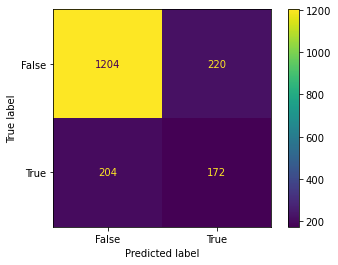

In [103]:
ConfusionMatrixDisplay.from_predictions(y_test, knn_cvpred, display_labels = [False, True])
plt.show()

### Bagging Classifier

In [104]:
dec_tree = DecisionTreeClassifier(random_state=123)

In [105]:
bagging_cls = BaggingClassifier(base_estimator=dec_tree, n_estimators=10, random_state=123)

In [106]:
# fit KNeighborsRegressor
bagging_cls.fit(X_ros_clean, y_ros)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=123),
                  random_state=123)

In [107]:
bagging_cls.score(X_ros_clean, y_ros)

0.9975754310344828

In [108]:
bagging_predict = bagging_cls.predict(X_test_clean)

In [109]:
print(classification_report(y_test, bagging_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1424
           1       0.62      0.57      0.60       376

    accuracy                           0.84      1800
   macro avg       0.76      0.74      0.75      1800
weighted avg       0.83      0.84      0.84      1800



In [110]:
print(f"Training Data Score: {bagging_cls.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {bagging_cls.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {bagging_cls.score(X_test_clean, y_test)}")

Training Data Score: 0.9975754310344828
Validating Data Score: 0.8408333333333333
Testing Data Score: 0.8388888888888889


## Tuning Parameter Bagging Classifier

In [111]:
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
bagging_param_grid = {'n_estimators' : [10, 100, 1000]}

In [112]:
bagging_grid_cv = GridSearchCV(estimator=BaggingClassifier(random_state=123), 
                               param_grid=bagging_param_grid, 
                               n_jobs=-1, 
                               cv=cv, 
                               scoring='accuracy',
                               error_score=0)

In [113]:
bagging_grid_cv.fit(X_ros_clean, y_ros)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=3, n_splits=10, random_state=123),
             error_score=0, estimator=BaggingClassifier(random_state=123),
             n_jobs=-1, param_grid={'n_estimators': [10, 100, 1000]},
             scoring='accuracy')

In [114]:
bagging_grid_cv.best_params_

{'n_estimators': 1000}

In [115]:
bagging_cv  = BaggingClassifier(n_estimators = bagging_grid_cv.best_params_["n_estimators"])

In [116]:
bagging_cv.fit(X_ros_clean, y_ros)

BaggingClassifier(n_estimators=1000)

In [117]:
baggingcv_predict = bagging_cv.predict(X_test_clean)

In [118]:
print(classification_report(y_test, baggingcv_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.89      0.91      0.90      1424
           1       0.62      0.59      0.61       376

    accuracy                           0.84      1800
   macro avg       0.76      0.75      0.75      1800
weighted avg       0.84      0.84      0.84      1800



In [119]:
print(f"Training Data Score: {bagging_cv.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {bagging_cv.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {bagging_cv.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.8475
Testing Data Score: 0.8394444444444444


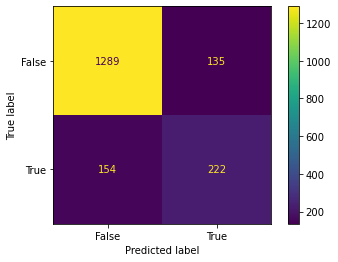

In [120]:
ConfusionMatrixDisplay.from_predictions(y_test, baggingcv_predict, display_labels = [False, True])
plt.show()

## Gradient Boosting

In [121]:
# Build GradientBoosting
grad_boost = GradientBoostingClassifier(random_state = 123)

In [122]:
# Fit GradientBoosting
grad_boost.fit(X_ros_clean, y_ros)

GradientBoostingClassifier(random_state=123)

In [123]:
grad_boost.score(X_ros_clean, y_ros)

0.805944683908046

In [124]:
gradboost_predict = grad_boost.predict(X_test_clean)

In [125]:
print(classification_report(y_test, gradboost_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.78      0.85      1424
           1       0.49      0.81      0.61       376

    accuracy                           0.78      1800
   macro avg       0.71      0.79      0.73      1800
weighted avg       0.84      0.78      0.80      1800



In [126]:
print(f"Training Data Score: {grad_boost.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {grad_boost.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {grad_boost.score(X_test_clean, y_test)}")

Training Data Score: 0.805944683908046
Validating Data Score: 0.7783333333333333
Testing Data Score: 0.7822222222222223


### Tuning Parameter Gradient Boosting

In [127]:
grad_param_grid = {
    'n_estimators' : [10, 50, 100],
    'learning_rate' : [0.001, 0.01, 0.1],
    'subsample' : [0.5, 0.7, 1.0],
    'max_depth' : [3, 7, 9]
}

In [128]:
grad_grid_cv = GridSearchCV(estimator=GradientBoostingClassifier(), 
                           param_grid=grad_param_grid,
                           cv=5, 
                           scoring='accuracy',
                           error_score=0)

In [129]:
grad_grid_cv.fit(X_ros_clean, y_ros)

GridSearchCV(cv=5, error_score=0, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'max_depth': [3, 7, 9], 'n_estimators': [10, 50, 100],
                         'subsample': [0.5, 0.7, 1.0]},
             scoring='accuracy')

In [130]:
grad_grid_cv.best_params_

{'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.7}

In [131]:
gradboost_cv  = GradientBoostingClassifier(n_estimators = grad_grid_cv.best_params_["n_estimators"],
                                           learning_rate = grad_grid_cv.best_params_["learning_rate"],
                                           subsample = grad_grid_cv.best_params_["subsample"],
                                           max_depth = grad_grid_cv.best_params_["max_depth"],
                                           random_state = 123)

In [132]:
gradboost_cv.fit(X_ros_clean, y_ros)

GradientBoostingClassifier(max_depth=9, random_state=123, subsample=0.7)

In [133]:
gradboost_pred_cv = gradboost_cv.predict(X_test_clean)

In [134]:
print(classification_report(y_test, gradboost_pred_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1424
           1       0.64      0.64      0.64       376

    accuracy                           0.85      1800
   macro avg       0.77      0.77      0.77      1800
weighted avg       0.85      0.85      0.85      1800



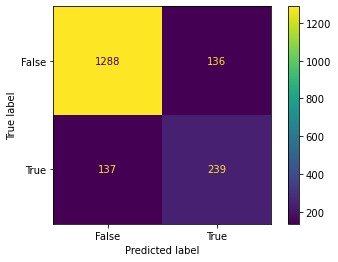

In [135]:
ConfusionMatrixDisplay.from_predictions(y_test, gradboost_pred_cv, display_labels = [False, True])
plt.show()

## Adaboost Classifier

### Adaboost SVC

In [136]:
svc = SVC(probability=True, kernel='linear', random_state = 123)

# Create adaboost classifer object
adaboost_svc = AdaBoostClassifier(n_estimators=50, 
                                  base_estimator=svc,
                                  learning_rate=1)

In [137]:
# Train Adaboost Classifer
adaboost_svc.fit(X_ros_clean, y_ros)

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True,
                                      random_state=123),
                   learning_rate=1)

In [138]:
adaboost_svc.score(X_ros_clean, y_ros)

0.6041666666666666

In [139]:
ada_predict = adaboost_svc.predict(X_test_clean)

In [140]:
print(classification_report(y_test, ada_predict, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.87      0.55      0.67      1424
           1       0.29      0.68      0.40       376

    accuracy                           0.58      1800
   macro avg       0.58      0.62      0.54      1800
weighted avg       0.75      0.58      0.62      1800



In [141]:
print(f"Training Data Score: {adaboost_svc.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {adaboost_svc.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {adaboost_svc.score(X_test_clean, y_test)}")

Training Data Score: 0.6041666666666666
Validating Data Score: 0.5525
Testing Data Score: 0.5761111111111111


### Adaboost Original

In [142]:
# Create adaboost classifer object
abc = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1,
                         random_state = 123)

In [143]:
# Train Adaboost Classifer
abc_ori = abc.fit(X_ros_clean, y_ros)

In [144]:
abc_ori.score(X_ros_clean, y_ros)

0.7755028735632183

In [145]:
adaboost_pred_ori = abc_ori.predict(X_test_clean)

In [146]:
print(classification_report(y_test, adaboost_pred_ori, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1424
           1       0.47      0.82      0.60       376

    accuracy                           0.77      1800
   macro avg       0.71      0.79      0.72      1800
weighted avg       0.84      0.77      0.79      1800



In [147]:
print(f"Training Data Score: {abc_ori.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {abc_ori.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {abc_ori.score(X_test_clean, y_test)}")

Training Data Score: 0.7755028735632183
Validating Data Score: 0.7716666666666666
Testing Data Score: 0.77


## Tuning Parameter Adaboost

In [148]:
adaboost = AdaBoostClassifier(random_state = 123)

In [149]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.5, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

In [150]:
grid_search_adaboost = GridSearchCV(adaboost, param_grid, scoring='accuracy', cv=5)

In [151]:
grid_search_adaboost.fit(X_ros_clean, y_ros)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(random_state=123),
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.1, 0.5, 1.0],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [152]:
print(grid_search_adaboost.best_params_)

{'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 200}


In [153]:
adaboost_best = AdaBoostClassifier(n_estimators = grid_search_adaboost.best_params_["n_estimators"],
                                   learning_rate = grid_search_adaboost.best_params_["learning_rate"],
                                   algorithm = grid_search_adaboost.best_params_["algorithm"]
                                  )

In [154]:
adaboost_best.fit(X_ros_clean, y_ros)

AdaBoostClassifier(n_estimators=200)

In [155]:
adaboost_pred_cv = adaboost_best.predict(X_test_clean)

In [156]:
print(classification_report(y_test, adaboost_pred_cv, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1424
           1       0.48      0.82      0.60       376

    accuracy                           0.78      1800
   macro avg       0.71      0.79      0.72      1800
weighted avg       0.84      0.78      0.79      1800



In [157]:
print(f"Training Data Score: {adaboost_best.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {adaboost_best.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {adaboost_best.score(X_test_clean, y_test)}")

Training Data Score: 0.78125
Validating Data Score: 0.7658333333333334
Testing Data Score: 0.7761111111111111


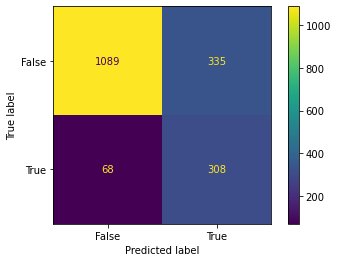

In [158]:
ConfusionMatrixDisplay.from_predictions(y_test, adaboost_pred_cv, display_labels = [False, True])
plt.show()

## Extratrees Classifier

In [159]:
extra_trees_awal = ExtraTreesClassifier(random_state = 123)

In [160]:
extra_trees_awal.fit(X_ros_clean, y_ros)

ExtraTreesClassifier(random_state=123)

In [161]:
extra_trees_awal.score(X_ros_clean, y_ros)

1.0

In [162]:
y_extratress_pred = extra_trees_awal.predict(X_test_clean)

In [163]:
print(classification_report(y_test, y_extratress_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1424
           1       0.74      0.49      0.59       376

    accuracy                           0.86      1800
   macro avg       0.81      0.72      0.75      1800
weighted avg       0.85      0.86      0.85      1800



In [164]:
print(f"Training Data Score: {extra_trees_awal.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {extra_trees_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {extra_trees_awal.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.8741666666666666
Testing Data Score: 0.8583333333333333


## Tuning Parameter Extratrees Classifier

In [165]:
extra_trees = ExtraTreesClassifier(random_state = 123) 

In [166]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [167]:
grid_search_et = GridSearchCV(extra_trees, param_grid, scoring='accuracy', cv=5)

In [168]:
grid_search_et.fit(X_ros_clean, y_ros)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(random_state=123),
             param_grid={'max_depth': [10, 20, 30, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy')

In [169]:
print(grid_search_et.best_params_)

{'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [170]:
extra_trees_best = ExtraTreesClassifier(n_estimators = grid_search_et.best_params_["n_estimators"], 
                                        max_depth = grid_search_et.best_params_["max_depth"], 
                                        min_samples_split= grid_search_et.best_params_["min_samples_split"], 
                                        min_samples_leaf=grid_search_et.best_params_["min_samples_leaf"])

In [171]:
extra_trees_best.fit(X_ros_clean, y_ros)

ExtraTreesClassifier(n_estimators=200)

In [172]:
extratreescv_pred = extra_trees_best.predict(X_test_clean)

In [173]:
print(classification_report(y_test, extratreescv_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1424
           1       0.73      0.49      0.59       376

    accuracy                           0.86      1800
   macro avg       0.81      0.72      0.75      1800
weighted avg       0.85      0.86      0.85      1800



In [174]:
print(f"Training Data Score: {extra_trees_best.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {extra_trees_best.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {extra_trees_best.score(X_test_clean, y_test)}")

Training Data Score: 1.0
Validating Data Score: 0.8675
Testing Data Score: 0.8566666666666667


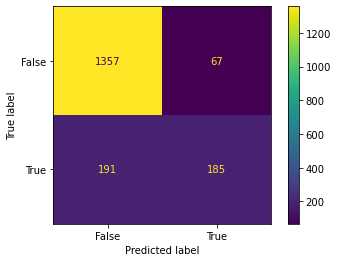

In [175]:
ConfusionMatrixDisplay.from_predictions(y_test, extratreescv_pred, display_labels = [False, True])
plt.show()

## XGboost Classifier

In [176]:
xgb_classifier = xgb.XGBClassifier(random_state = 123)

In [177]:
xgb_classifier.fit(X_ros_clean, y_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=123, ...)

In [178]:
xgb_classifier.score(X_ros_clean, y_ros)

0.9709051724137931

In [179]:
xgb_pred = xgb_classifier.predict(X_test_clean)

In [180]:
print(classification_report(y_test, xgb_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1424
           1       0.59      0.72      0.65       376

    accuracy                           0.84      1800
   macro avg       0.75      0.79      0.77      1800
weighted avg       0.85      0.84      0.84      1800



In [181]:
print(f"Training Data Score: {xgb_classifier.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {xgb_classifier.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {xgb_classifier.score(X_test_clean, y_test)}")

Training Data Score: 0.9709051724137931
Validating Data Score: 0.815
Testing Data Score: 0.8361111111111111


## Tuning Parameter XGboost

In [182]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.5, 1.0],
    'subsample': [0.5, 0.7, 1.0]
}


In [183]:
grid_search_xg = GridSearchCV(xgb_classifier, param_grid, scoring='accuracy', cv=5)

In [184]:
grid_search_xg.fit(X_ros_clean, y_ros)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                   

In [185]:
print(grid_search_xg.best_params_)

{'learning_rate': 0.5, 'max_depth': 7, 'n_estimators': 200, 'subsample': 1.0}


In [186]:
xgb_best = xgb.XGBClassifier(n_estimators = grid_search_xg.best_params_["n_estimators"], 
                             max_depth = grid_search_xg.best_params_["max_depth"], 
                             learning_rate = grid_search_xg.best_params_["learning_rate"], 
                             subsample = grid_search_xg.best_params_["subsample"])

In [187]:
xgb_best.fit(X_ros_clean, y_ros)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [188]:
xgboost_cv_pred = xgb_best.predict(X_test_clean)

In [189]:
print(classification_report(y_test, xgboost_cv_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1424
           1       0.62      0.60      0.61       376

    accuracy                           0.84      1800
   macro avg       0.76      0.75      0.75      1800
weighted avg       0.84      0.84      0.84      1800



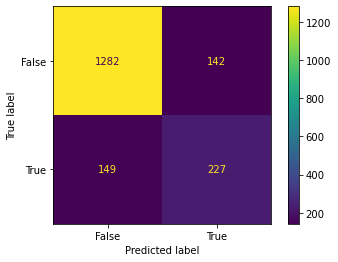

In [190]:
ConfusionMatrixDisplay.from_predictions(y_test, xgboost_cv_pred, display_labels = [False, True])
plt.show()

## Deep Learning

In [191]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(13,)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(1, activation='sigmoid')
])

In [192]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [193]:
history = model.fit(X_ros_clean, y_ros, epochs=500, batch_size=32, validation_data=(X_valid_clean, y_valid))

Epoch 1/500
348/348 [==============================] - 4s 3ms/step - loss: 0.6113 - accuracy: 0.6699 - val_loss: 0.6031 - val_accuracy: 0.6817
Epoch 2/500
348/348 [==============================] - 1s 2ms/step - loss: 0.5736 - accuracy: 0.7069 - val_loss: 0.5712 - val_accuracy: 0.7133
Epoch 3/500
348/348 [==============================] - 1s 2ms/step - loss: 0.5457 - accuracy: 0.7267 - val_loss: 0.5149 - val_accuracy: 0.7667
Epoch 4/500
348/348 [==============================] - 1s 2ms/step - loss: 0.5246 - accuracy: 0.7394 - val_loss: 0.5342 - val_accuracy: 0.7417
Epoch 5/500
348/348 [==============================] - 1s 2ms/step - loss: 0.5084 - accuracy: 0.7497 - val_loss: 0.5437 - val_accuracy: 0.7333
Epoch 6/500
348/348 [==============================] - 1s 2ms/step - loss: 0.4939 - accuracy: 0.7594 - val_loss: 0.5148 - val_accuracy: 0.7600
Epoch 7/500
348/348 [==============================] - 1s 2ms/step - loss: 0.4834 - accuracy: 0.7681 - val_loss: 0.4919 - val_accuracy: 0.7683

Epoch 58/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3998 - accuracy: 0.8164 - val_loss: 0.4595 - val_accuracy: 0.7900
Epoch 59/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3967 - accuracy: 0.8174 - val_loss: 0.4880 - val_accuracy: 0.7642
Epoch 60/500
348/348 [==============================] - 1s 2ms/step - loss: 0.4016 - accuracy: 0.8211 - val_loss: 0.4549 - val_accuracy: 0.7908
Epoch 61/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3943 - accuracy: 0.8160 - val_loss: 0.4257 - val_accuracy: 0.8042
Epoch 62/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3922 - accuracy: 0.8164 - val_loss: 0.4778 - val_accuracy: 0.7725
Epoch 63/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3952 - accuracy: 0.8165 - val_loss: 0.4601 - val_accuracy: 0.7825
Epoch 64/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3919 - accuracy: 0.8182 - val_loss: 0.4841 - val_accuracy:

Epoch 115/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3664 - accuracy: 0.8340 - val_loss: 0.4922 - val_accuracy: 0.7642
Epoch 116/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3623 - accuracy: 0.8349 - val_loss: 0.4569 - val_accuracy: 0.7883
Epoch 117/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3600 - accuracy: 0.8358 - val_loss: 0.4758 - val_accuracy: 0.7758
Epoch 118/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3631 - accuracy: 0.8346 - val_loss: 0.4978 - val_accuracy: 0.7708
Epoch 119/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3622 - accuracy: 0.8353 - val_loss: 0.4634 - val_accuracy: 0.7900
Epoch 120/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3621 - accuracy: 0.8385 - val_loss: 0.4867 - val_accuracy: 0.7692
Epoch 121/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3640 - accuracy: 0.8369 - val_loss: 0.4910 - val_ac

348/348 [==============================] - 1s 2ms/step - loss: 0.3479 - accuracy: 0.8476 - val_loss: 0.4626 - val_accuracy: 0.7925
Epoch 172/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3493 - accuracy: 0.8432 - val_loss: 0.4832 - val_accuracy: 0.7800
Epoch 173/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3477 - accuracy: 0.8420 - val_loss: 0.4831 - val_accuracy: 0.7742
Epoch 174/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3548 - accuracy: 0.8421 - val_loss: 0.4758 - val_accuracy: 0.7842
Epoch 175/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3533 - accuracy: 0.8393 - val_loss: 0.4674 - val_accuracy: 0.7900
Epoch 176/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3561 - accuracy: 0.8393 - val_loss: 0.4753 - val_accuracy: 0.7858
Epoch 177/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3421 - accuracy: 0.8481 - val_loss: 0.4778 - val_accuracy: 0.7883

348/348 [==============================] - 1s 2ms/step - loss: 0.3383 - accuracy: 0.8463 - val_loss: 0.4666 - val_accuracy: 0.7775
Epoch 228/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3364 - accuracy: 0.8512 - val_loss: 0.4899 - val_accuracy: 0.7717
Epoch 229/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3369 - accuracy: 0.8496 - val_loss: 0.4704 - val_accuracy: 0.7917
Epoch 230/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3352 - accuracy: 0.8490 - val_loss: 0.4608 - val_accuracy: 0.7908
Epoch 231/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3395 - accuracy: 0.8500 - val_loss: 0.4935 - val_accuracy: 0.7708
Epoch 232/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3348 - accuracy: 0.8501 - val_loss: 0.4663 - val_accuracy: 0.7792
Epoch 233/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3377 - accuracy: 0.8512 - val_loss: 0.4702 - val_accuracy: 0.7767

348/348 [==============================] - 1s 2ms/step - loss: 0.3271 - accuracy: 0.8580 - val_loss: 0.4633 - val_accuracy: 0.7817
Epoch 284/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3291 - accuracy: 0.8537 - val_loss: 0.4787 - val_accuracy: 0.7867
Epoch 285/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3349 - accuracy: 0.8523 - val_loss: 0.4798 - val_accuracy: 0.7758
Epoch 286/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3325 - accuracy: 0.8554 - val_loss: 0.4880 - val_accuracy: 0.7833
Epoch 287/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3278 - accuracy: 0.8551 - val_loss: 0.4678 - val_accuracy: 0.7867
Epoch 288/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3333 - accuracy: 0.8550 - val_loss: 0.4961 - val_accuracy: 0.7625
Epoch 289/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3329 - accuracy: 0.8534 - val_loss: 0.4838 - val_accuracy: 0.7733

348/348 [==============================] - 1s 2ms/step - loss: 0.3321 - accuracy: 0.8536 - val_loss: 0.4749 - val_accuracy: 0.7825
Epoch 340/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3218 - accuracy: 0.8593 - val_loss: 0.4807 - val_accuracy: 0.7858
Epoch 341/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3251 - accuracy: 0.8549 - val_loss: 0.4711 - val_accuracy: 0.7892
Epoch 342/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3284 - accuracy: 0.8561 - val_loss: 0.4754 - val_accuracy: 0.7892
Epoch 343/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3320 - accuracy: 0.8533 - val_loss: 0.4910 - val_accuracy: 0.7683
Epoch 344/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3267 - accuracy: 0.8570 - val_loss: 0.4787 - val_accuracy: 0.7858
Epoch 345/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3273 - accuracy: 0.8578 - val_loss: 0.4688 - val_accuracy: 0.7900

348/348 [==============================] - 1s 2ms/step - loss: 0.3209 - accuracy: 0.8607 - val_loss: 0.4971 - val_accuracy: 0.7692
Epoch 396/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8570 - val_loss: 0.4732 - val_accuracy: 0.7792
Epoch 397/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3227 - accuracy: 0.8571 - val_loss: 0.4901 - val_accuracy: 0.7683
Epoch 398/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3185 - accuracy: 0.8622 - val_loss: 0.4846 - val_accuracy: 0.7842
Epoch 399/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3200 - accuracy: 0.8597 - val_loss: 0.4845 - val_accuracy: 0.7850
Epoch 400/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3220 - accuracy: 0.8615 - val_loss: 0.4910 - val_accuracy: 0.7808
Epoch 401/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3266 - accuracy: 0.8584 - val_loss: 0.4859 - val_accuracy: 0.7825

348/348 [==============================] - 1s 2ms/step - loss: 0.3174 - accuracy: 0.8614 - val_loss: 0.4978 - val_accuracy: 0.7750
Epoch 452/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3160 - accuracy: 0.8594 - val_loss: 0.4878 - val_accuracy: 0.7833
Epoch 453/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3228 - accuracy: 0.8577 - val_loss: 0.4913 - val_accuracy: 0.7708
Epoch 454/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3170 - accuracy: 0.8613 - val_loss: 0.5034 - val_accuracy: 0.7742
Epoch 455/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3196 - accuracy: 0.8615 - val_loss: 0.4953 - val_accuracy: 0.7742
Epoch 456/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3167 - accuracy: 0.8597 - val_loss: 0.5091 - val_accuracy: 0.7725
Epoch 457/500
348/348 [==============================] - 1s 2ms/step - loss: 0.3187 - accuracy: 0.8588 - val_loss: 0.4762 - val_accuracy: 0.7800

In [194]:
deep_pred = np.argmax(model.predict(X_valid_clean), axis=-1)
accuracy = accuracy_score(y_valid, deep_pred)
print("Accuracy:", accuracy)

38/38 [==============================] - 0s 1ms/step
Accuracy: 0.8091666666666667


In [195]:
deep_pred = np.argmax(model.predict(X_test_clean), axis=-1)
accuracy = accuracy_score(y_test, deep_pred)
print("Accuracy:", accuracy)

57/57 [==============================] - 0s 1ms/step
Accuracy: 0.7911111111111111


In [196]:
print(classification_report(y_test, deep_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1424
           1       0.00      0.00      0.00       376

    accuracy                           0.79      1800
   macro avg       0.40      0.50      0.44      1800
weighted avg       0.63      0.79      0.70      1800



## Tuning Parameter Deep Learning

In [197]:
def create_model(units=64, layers=2, dropout=0.2):
    model = Sequential()
    model.add(Dense(units, activation='relu', input_shape=(13,)))
    model.add(Dropout(dropout))
    for i in range(layers-1):
        model.add(Dense(units, activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [198]:
model = KerasClassifier(build_fn=create_model)

In [199]:
param_grid = {
    'units': [32, 64, 128],
    'layers': [2, 3, 4],
    'dropout': [0.2, 0.3, 0.4]
}

In [200]:
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

In [201]:
grid_result = grid.fit(X_ros_clean, y_ros)

279/279 [==============================] - 1s 2ms/step - loss: 0.6523 - accuracy: 0.6216


70/70 [==============================] - 0s 1ms/step - loss: 0.6594 - accuracy: 0.6399


348/348 [==============================] - 2s 3ms/step - loss: 0.5914 - accuracy: 0.6914


In [202]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best: 0.666486 using {'dropout': 0.2, 'layers': 4, 'units': 128}


In [203]:
deep_pred = np.argmax(grid_result.predict(X_test_clean), axis=-1)
accuracy = accuracy_score(y_test, deep_pred)
print("Accuracy:", accuracy)

57/57 [==============================] - 0s 1ms/step
Accuracy: 0.7911111111111111


In [204]:
print(classification_report(y_test, deep_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88      1424
           1       0.00      0.00      0.00       376

    accuracy                           0.79      1800
   macro avg       0.40      0.50      0.44      1800
weighted avg       0.63      0.79      0.70      1800



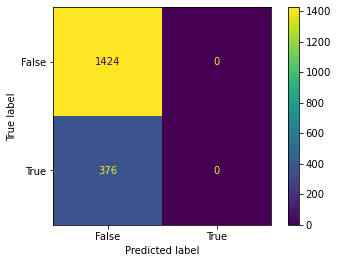

In [205]:
ConfusionMatrixDisplay.from_predictions(y_test, deep_pred, display_labels = [False, True])
plt.show()

## LightGBM

In [206]:
# define the LightGBM classifier
lgb_awal = LGBMClassifier(random_state = 123)

In [207]:
lgb_awal.fit(X_ros_clean, y_ros)

LGBMClassifier(random_state=123)

In [208]:
# train the classifier
lgb_awal.score(X_ros_clean, y_ros)

0.9201688218390804

In [209]:
# make predictions on the testing set
lgb_pred = lgb_awal.predict(X_test_clean)

In [210]:
print(f"Training Data Score: {lgb_awal.score(X_ros_clean, y_ros)}")
print(f"Validating Data Score: {lgb_awal.score(X_valid_clean, y_valid)}")
print(f"Testing Data Score: {lgb_awal.score(X_test_clean, y_test)}")

Training Data Score: 0.9201688218390804
Validating Data Score: 0.8075
Testing Data Score: 0.8105555555555556


In [211]:
print(classification_report(y_test, lgb_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.82      0.87      1424
           1       0.53      0.77      0.63       376

    accuracy                           0.81      1800
   macro avg       0.73      0.80      0.75      1800
weighted avg       0.85      0.81      0.82      1800



## Tuning Parameter LightGBM

In [212]:
# define the LightGBM classifier
lgb = LGBMClassifier()

In [213]:
# define the hyperparameters to tune
param_grid = {
    'num_leaves': [10, 20, 30],
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001]
}

In [214]:
# create the grid search object
grid_search_lgb = GridSearchCV(lgb, param_grid=param_grid, cv=5)

In [215]:
# train the grid search object
grid_search_lgb.fit(X_ros_clean, y_ros)

GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 4, 5], 'num_leaves': [10, 20, 30]})

In [216]:
best_params = grid_search_lgb.best_params_

In [217]:
lgbm_best = LGBMClassifier(**best_params)

In [218]:
lgbm_best.fit(X_ros_clean, y_ros)

LGBMClassifier(max_depth=5, num_leaves=30)

In [219]:
lgb_best_pred = lgbm_best.predict(X_test_clean)

In [220]:
print(classification_report(y_test, lgb_best_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.93      0.80      0.86      1424
           1       0.51      0.78      0.62       376

    accuracy                           0.80      1800
   macro avg       0.72      0.79      0.74      1800
weighted avg       0.85      0.80      0.81      1800



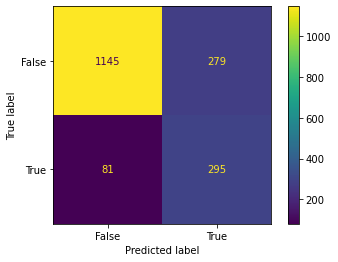

In [221]:
ConfusionMatrixDisplay.from_predictions(y_test, lgb_best_pred, display_labels = [False, True])
plt.show()

In [222]:
# evaluate the classifier using accuracy score and ROC AUC score
acc = accuracy_score(y_test, lgb_best_pred)
roc_auc = roc_auc_score(y_test, lgb_best_pred)
print('Accuracy:', acc)
print('ROC AUC score:', roc_auc)

Accuracy: 0.8
ROC AUC score: 0.7943237508964858


In [223]:
import pandas as pd
from sklearn.metrics import classification_report

# definisikan model-model yang ingin dibandingkan
models = {'Logistic Regression': logreg_awal, 
          'Logistic Regression CV': lr_grid_cv,
          'Decision Tree': decTree, 
          'Decision Tree CV': best_decTree,
          'Support Vector Classifier':svc_ori,
          'Support Vector Classifier CV':svc_grid_cv,
          'Random Forest':random_forest,
          'Random Forest CV':random_forestcls_cv,
          'Ridge':ridge,
          'Ridge CV':ridge_cv,
          'KNN':knn_awal,
          'KNN CV':kn_grid,
          'Bagging':bagging_cls,
          'Bagging CV':bagging_cv,
          'gradient Boosting':grad_boost,
          'gradient Boosting CV':gradboost_cv,
          'Adaboost':abc_ori,
          'Adaboost SVC':adaboost_svc,
          'Adaboost CV':adaboost_best,
          'Extratrees':extra_trees_awal,
          'Extratrees CV':extra_trees_best,
          'XGboost':xgb_classifier,
          'XGboost CV':xgb_best,
          'LightGBM':lgb_awal,
          'LightGBM CV':lgbm_best
         }

# loop untuk menghitung dan menyimpan metrik untuk setiap model
results = {}
for name, model in models.items():
    # hitung prediksi pada data test
    y_pred = model.predict(X_test_clean)
    # hitung metrik
    report = classification_report(y_test, y_pred, output_dict=True)
    # simpan metrik ke dictionary
    results[name] = {
        'precision': report['weighted avg']['precision'],
        'recall': report['weighted avg']['recall'],
        'f1_score': report['weighted avg']['f1-score'],
        'accuracy': report['accuracy'],
        'macro_avg_precision': report['macro avg']['precision'],
        'macro_avg_recall': report['macro avg']['recall'],
        'macro_avg_f1_score': report['macro avg']['f1-score'],
        'weighted_avg_precision': report['weighted avg']['precision'],
        'weighted_avg_recall': report['weighted avg']['recall'],
        'weighted_avg_f1_score': report['weighted avg']['f1-score']
    }

# buat dataframe dari dictionary
df_results = pd.DataFrame.from_dict(results, orient='index')

# tampilkan dataframe sebagai tabel
print(df_results)


                              precision    recall  f1_score  accuracy  \
Logistic Regression            0.805346  0.678889  0.708610  0.678889   
Logistic Regression CV         0.808331  0.681667  0.711141  0.681667   
Decision Tree                  0.805284  0.799444  0.802136  0.799444   
Decision Tree CV               0.823741  0.796111  0.805962  0.796111   
Support Vector Classifier      0.843455  0.782778  0.799171  0.782778   
Support Vector Classifier CV   0.841055  0.781111  0.797518  0.781111   
Random Forest                  0.839840  0.779444  0.796014  0.779444   
Random Forest CV               0.846486  0.833889  0.838807  0.833889   
Ridge                          0.803996  0.681667  0.710995  0.681667   
Ridge CV                       0.803996  0.681667  0.710995  0.681667   
KNN                            0.794695  0.716667  0.739657  0.716667   
KNN CV                         0.768145  0.764444  0.766233  0.764444   
Bagging                        0.834461  0.838889  

In [224]:
df_results

,precision,recall,f1_score,accuracy,macro_avg_precision,macro_avg_recall,macro_avg_f1_score,weighted_avg_precision,weighted_avg_recall,weighted_avg_f1_score
Logistic Regression,0.805346,0.678889,0.708610,0.678889,0.646059,0.717779,0.633736,0.805346,0.678889,0.708610
Logistic Regression CV,0.808331,0.681667,0.711141,0.681667,0.649165,0.722470,0.637066,0.808331,0.681667,0.711141
Decision Tree,0.805284,0.799444,0.802136,0.799444,0.699761,0.710786,0.704856,0.805284,0.799444,0.802136
Decision Tree CV,0.823741,0.796111,0.805962,0.796111,0.707917,0.752719,0.723375,0.823741,0.796111,0.805962
Support Vector Classifier,0.843455,0.782778,0.799171,0.782778,0.712612,0.790290,0.728470,0.843455,0.782778,0.799171
Support Vector Classifier CV,0.841055,0.781111,0.797518,0.781111,0.710178,0.786300,0.725874,0.841055,0.781111,0.797518
Random Forest,0.839840,0.779444,0.796014,0.779444,0.708524,0.784268,0.723960,0.839840,0.779444,0.796014
Random Forest CV,0.846486,0.833889,0.838807,0.833889,0.750823,0.782468,0.764109,0.846486,0.833889,0.838807
Ridge,0.803996,0.681667,0.710995,0.681667,0.645723,0.716598,0.635103,0.803996,0.681667,0.710995
Ridge CV,0.803996,0.681667,0.710995,0.681667,0.645723,0.716598,0.635103,0.803996,0.681667,0.710995


# Save Model

## Logistic Regression

In [225]:
logreg = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/logreg.pkl'
with open(logreg, 'wb') as file:
    pickle.dump(logreg_awal, file)
    
logreg_cv = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/logreg_cv.pkl'
with open(logreg_cv, 'wb') as file:
    pickle.dump(lr_grid_cv, file)

## Support Vector Classifier

In [226]:
svc = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/svc.pkl'
with open(svc, 'wb') as file:
    pickle.dump(svc_ori, file)
    
svc_cv = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/svc_cv.pkl'
with open(svc_cv, 'wb') as file:
    pickle.dump(svc_grid_cv, file)

## Decisiontree

In [227]:
dectree = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/dectree.pkl'
with open(dectree, 'wb') as file:
    pickle.dump(decTree, file)
    
dectree_cv = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/dectree_cv.pkl'
with open(dectree_cv, 'wb') as file:
    pickle.dump(best_decTree, file)

## Randomforest

In [228]:
randomforest = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/randomforest.pkl'
with open(randomforest, 'wb') as file:
    pickle.dump(random_forest, file)
    
randomforest_cv = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/randomforest_cv.pkl'
with open(randomforest_cv, 'wb') as file:
    pickle.dump(random_forestcls_cv, file)

## Ridge Classifier

In [229]:
ridge = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/ridge.pkl'
with open(ridge, 'wb') as file:
    pickle.dump(ridge, file)
    
ridge_cv = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/ridge_cv.pkl'
with open(ridge_cv, 'wb') as file:
    pickle.dump(ridge_cv, file)

## KNN 

In [230]:
knn = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/knn.pkl'
with open(knn, 'wb') as file:
    pickle.dump(knn_awal, file)
    
knn_cv = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/knn_cv.pkl'
with open(knn_cv, 'wb') as file:
    pickle.dump(kn_grid, file)

## Bagging Classifier

In [231]:
bagging = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/bagging.pkl'
with open(bagging, 'wb') as file:
    pickle.dump(bagging_cls, file)
    
bagging_cv = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/bagging_cv.pkl'
with open(bagging_cv, 'wb') as file:
    pickle.dump(bagging_cv, file)

## Gradient Boosting

In [232]:
grad_boost = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/grad_boost.pkl'
with open(grad_boost, 'wb') as file:
    pickle.dump(grad_boost, file)
    
grad_boost_cv = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/grad_boost_cv.pkl'
with open(grad_boost_cv, 'wb') as file:
    pickle.dump(gradboost_cv, file)

## Adaboost

In [233]:
adaboost_svc = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/adaboost_svc.pkl'
with open(adaboost_svc, 'wb') as file:
    pickle.dump(adaboost_svc, file)
    
adaboost_ori = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/adaboost_ori.pkl'
with open(adaboost_ori, 'wb') as file:
    pickle.dump(abc_ori, file)
    
adaboost_cv = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/adaboost_cv.pkl'
with open(adaboost_cv, 'wb') as file:
    pickle.dump(adaboost_best, file)

## Extratrees

In [234]:
extra_trees = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/extra_trees.pkl'
with open(extra_trees, 'wb') as file:
    pickle.dump(extra_trees_awal, file)
    
extra_tree_cv = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/extra_tree_cv.pkl'
with open(extra_tree_cv, 'wb') as file:
    pickle.dump(extra_trees_best, file)

## XgBoost

In [235]:
xgboost = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/xgboost.pkl'
with open(xgboost, 'wb') as file:
    pickle.dump(xgb_classifier, file)
    
xgboost_cv = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/xgboost_cv.pkl'
with open(xgboost_cv, 'wb') as file:
    pickle.dump(xgb_best, file)

## Deep Learning

In [236]:
deep_learning = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/deep_learning.pkl'
with open(deep_learning, 'wb') as file:
    pickle.dump(model, file)
    
deep_learning_cv = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/deep_learning_cv.pkl'
with open(deep_learning_cv, 'wb') as file:
    pickle.dump(grid_result, file)

INFO:tensorflow:Assets written to: C:\Users\HALAL\AppData\Local\Temp\tmpqzl48oxu\assets


## LightGBM

In [237]:
lgbm = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/lgbm.pkl'
with open(lgbm, 'wb') as file:
    pickle.dump(lgb_awal, file)
    
lgbm_cv = 'C:/Users/HALAL/Final Project ML Process/model/3 - Model Random Over Sampling/lgbm_cv.pkl'
with open(lgbm_cv, 'wb') as file:
    pickle.dump(lgbm_best, file)